In [61]:
#import dependencies
import statsmodels.api as sm
from pytrends.request import TrendReq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json

%matplotlib inline

In [62]:
#weekly gas prices in San Francisco Area
#read csv 
weekly_gas_prices = pd.read_csv("Resources/weekly_gas_prices_ca_2.csv")

#rename column 
#weekly_gas_prices = weekly_gas_prices.rename(columns={'Weekly San Francisco All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)':'Price'})

#preview data
weekly_gas_prices.head()

weekly_gas_prices = weekly_gas_prices.set_index("Date")
weekly_gas_prices = weekly_gas_prices.dropna()
weekly_gas_prices_1718 = weekly_gas_prices.loc["2017-09-06":"2018-09-08",:]
weekly_gas_prices_1718.count()

Price    52
dtype: int64

In [63]:
weekly_gas_prices.head()

,Price
Date,
2013-09-16,4.096
2013-09-23,4.052
2013-09-30,3.980
2013-10-07,3.898
2013-10-14,3.840


In [64]:
#save the gas price values into a list
gas_array = weekly_gas_prices_1718["Price"].values
gas_list = np.ndarray.tolist(gas_array)
len(gas_list)

52

In [65]:
#connect to Google
pytrends = TrendReq(hl='en-US', tz=360)

In [66]:
#set search parameter to 'Tesla'
kw_list = ['Tesla']
pytrends.build_payload(kw_list, cat=0, timeframe='2013-09-17 2018-09-09', geo='US-CA',gprop='')

In [67]:
#import tesla google searches over time
tesla_searches = pytrends.interest_over_time()
len(tesla_searches)

260

In [68]:
tesla_searches_1718 = tesla_searches.iloc[208:260,:]
tesla_searches_1718.head()

,Tesla,isPartial
date,,
2017-09-17,21,False
2017-09-24,20,False
2017-10-01,21,False
2017-10-08,21,False
2017-10-15,21,False


In [69]:
len(tesla_searches_1718)

52

In [70]:
#append Tesla google search popularity to a list
tesla_array = tesla_searches_1718["Tesla"].values
tesla_list = np.ndarray.tolist(tesla_array)

In [71]:
#set parameter to 'Electric car'
kw_list = ['Electric car']
pytrends.build_payload(kw_list, cat=0, timeframe='2013-09-17 2018-09-09', geo='US-CA',gprop='')

In [72]:
#import Electric car Google searches over time
ecar_searches = pytrends.interest_over_time()
len(ecar_searches)

260

In [73]:
ecar_searches_1718 = ecar_searches.iloc[208:260,:]
ecar_searches_1718.head()

,Electric car,isPartial
date,,
2017-09-17,67,False
2017-09-24,61,False
2017-10-01,65,False
2017-10-08,63,False
2017-10-15,61,False


In [74]:
len(ecar_searches_1718)

52

In [75]:
#append Electric car google search popularity to a list
ecar_array = ecar_searches_1718["Electric car"].values
ecar_list = np.ndarray.tolist(ecar_array)
len(ecar_list)

52

In [76]:
#set parameter to 'Prius'
kw_list = ['Prius']
pytrends.build_payload(kw_list, cat=0, timeframe='2013-09-17 2018-09-09', geo='US-CA',gprop='')

In [77]:
#import Prius Google searches over time
prius_searches = pytrends.interest_over_time()
len(prius_searches)

260

In [78]:
prius_searches_1718 = prius_searches.iloc[208:260,:]
prius_searches_1718.head()

,Prius,isPartial
date,,
2017-09-17,54,False
2017-09-24,53,False
2017-10-01,50,False
2017-10-08,49,False
2017-10-15,51,False


In [79]:
len(prius_searches_1718)

52

In [80]:
#append Prius Google search popularity to a list
prius_array = prius_searches_1718["Prius"].values
prius_list = np.ndarray.tolist(prius_array)
len(prius_list)

52

In [81]:
comparison_df = weekly_gas_prices_1718.assign(Tesla = tesla_list, Electric_Cars = ecar_list, Prius = prius_list)

comparison_df.head()

,Price,Tesla,Electric_Cars,Prius
Date,,,,
2017-09-11,3.242,21,67,54
2017-09-18,3.219,20,61,53
2017-09-25,3.199,21,65,50
2017-10-02,3.166,21,63,49
2017-10-09,3.139,21,61,51


In [82]:
comparison_df['Price'] = comparison_df['Price']*10

comparison_df.head()


,Price,Tesla,Electric_Cars,Prius
Date,,,,
2017-09-11,32.42,21,67,54
2017-09-18,32.19,20,61,53
2017-09-25,31.99,21,65,50
2017-10-02,31.66,21,63,49
2017-10-09,31.39,21,61,51


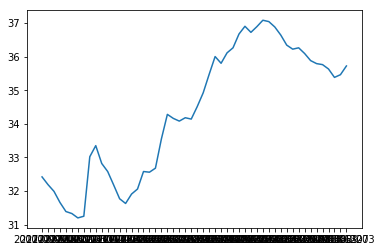

In [83]:
Price_df = comparison_df["Price"]

plt.plot(Price_df)

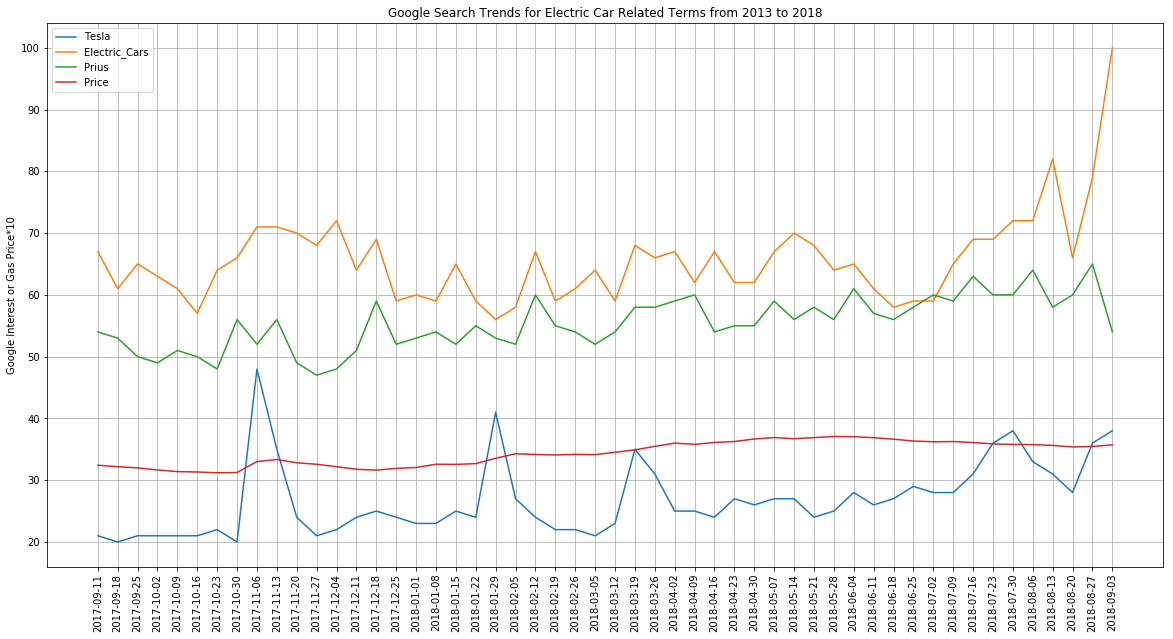

In [84]:
plt.figure(figsize=(20,10))
plt.plot(comparison_df["Tesla"])
plt.plot(comparison_df["Electric_Cars"])
plt.plot(comparison_df["Prius"])
plt.plot(comparison_df["Price"])
plt.title("Google Search Trends for Electric Car Related Terms from 2013 to 2018")
plt.ylabel("Google Interest or Gas Price*10")
plt.xticks(rotation=90)
plt.legend()
#plt.savefig("Images/1314/trends_gasprice_comparison.png")
plt.grid()
plt.show()

In [85]:
#do a rolling average over the 5-year trends data to normalize the spikes for a better visual

from numpy import convolve
 
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

rolling_prius = movingaverage(prius_list,10)

rolling_ecar = movingaverage(ecar_list,10)

rolling_tesla = movingaverage(tesla_list, 10)

In [86]:
#remove first value from gas_list so there are the same amt of values

weekly_gas_prices_rolled = weekly_gas_prices_1718.iloc[9:]
weekly_gas_prices_rolled.head()

,Price
Date,
2017-11-13,3.335
2017-11-20,3.282
2017-11-27,3.258
2017-12-04,3.218
2017-12-11,3.177


In [87]:
#save the gas price values into a list
rolled_gas_array = weekly_gas_prices_rolled["Price"].values
rolled_gas_list = np.ndarray.tolist(rolled_gas_array)
len(rolled_gas_list)

43

In [88]:
rolling_comparison_df = weekly_gas_prices_rolled.assign(Tesla = rolling_tesla, Electric_Cars = rolling_ecar, Prius = rolling_prius)

rolling_comparison_df.head()

,Price,Tesla,Electric_Cars,Prius
Date,,,,
2017-11-13,3.335,25.0,64.6,51.9
2017-11-20,3.282,25.3,64.9,51.4
2017-11-27,3.258,25.4,65.6,50.8
2017-12-04,3.218,25.5,66.3,50.6
2017-12-11,3.177,25.8,66.4,50.8


In [89]:
rolling_comparison_df['Price'] = rolling_comparison_df['Price']*10
rolling_comparison_df.head()

,Price,Tesla,Electric_Cars,Prius
Date,,,,
2017-11-13,33.35,25.0,64.6,51.9
2017-11-20,32.82,25.3,64.9,51.4
2017-11-27,32.58,25.4,65.6,50.8
2017-12-04,32.18,25.5,66.3,50.6
2017-12-11,31.77,25.8,66.4,50.8


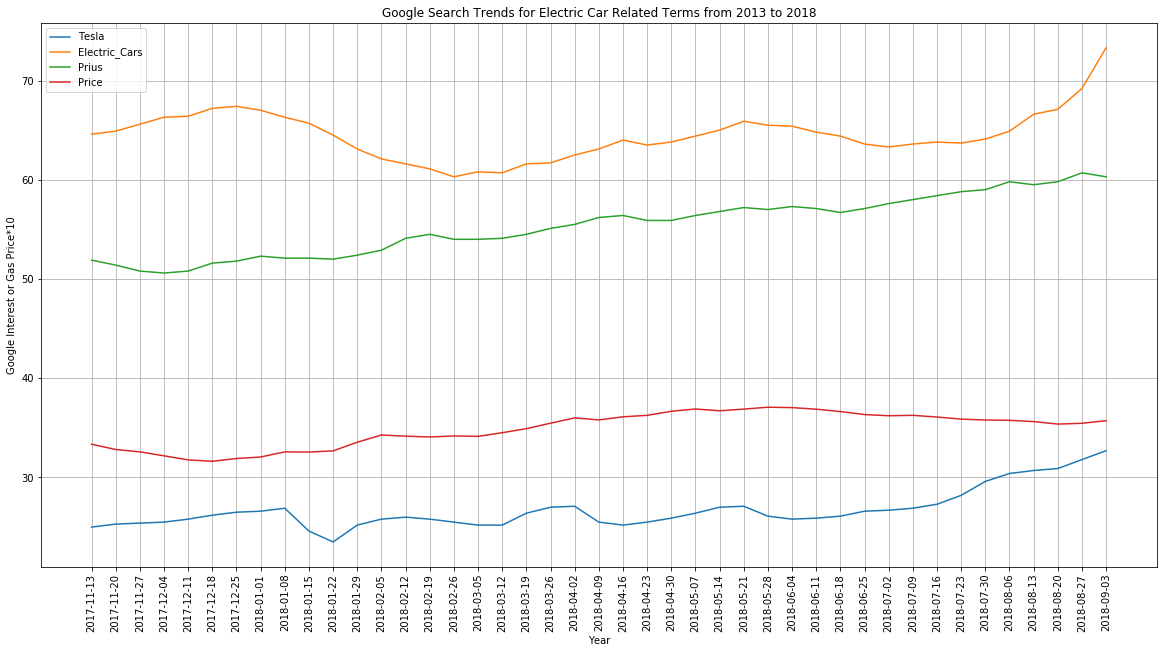

In [90]:
plt.figure(figsize=(20,10))
plt.plot(rolling_comparison_df["Tesla"])
plt.plot(rolling_comparison_df["Electric_Cars"])
plt.plot(rolling_comparison_df["Prius"])
plt.plot(rolling_comparison_df["Price"])

plt.title("Google Search Trends for Electric Car Related Terms from 2013 to 2018")
plt.xlabel("Year")
plt.ylabel("Google Interest or Gas Price*10")
plt.legend()
plt.xticks(rotation=90)
#plt.savefig("Images/1314/trends_gasprice_rollingcomparison.png")
plt.grid()
plt.show()

In [91]:
#STATISTICAL ANALYSIS

#compare gas price line (independant variable) with each google search result (dependent variables)

#OPTION 1: Create scatter plot for x=gas price y=trend
#          Calculate line of best fit
#          Try it with Prius first

In [92]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(rolled_gas_list, rolling_prius)


In [93]:
print("y=", slope, "* x +", intercept)
print("   ")
print("r-squared:", r_value**2)
print("r-value:", r_value)
print("p-value:", p_value)
print("standard error:", std_err)

y= 14.088530095785261 * x + 6.2471618221502325
   
r-squared: 0.6840463118656922
r-value: 0.8270709231170518
p-value: 8.18626941200173e-12
standard error: 1.495349526325222


Text(0,0.5,'Google Searches')

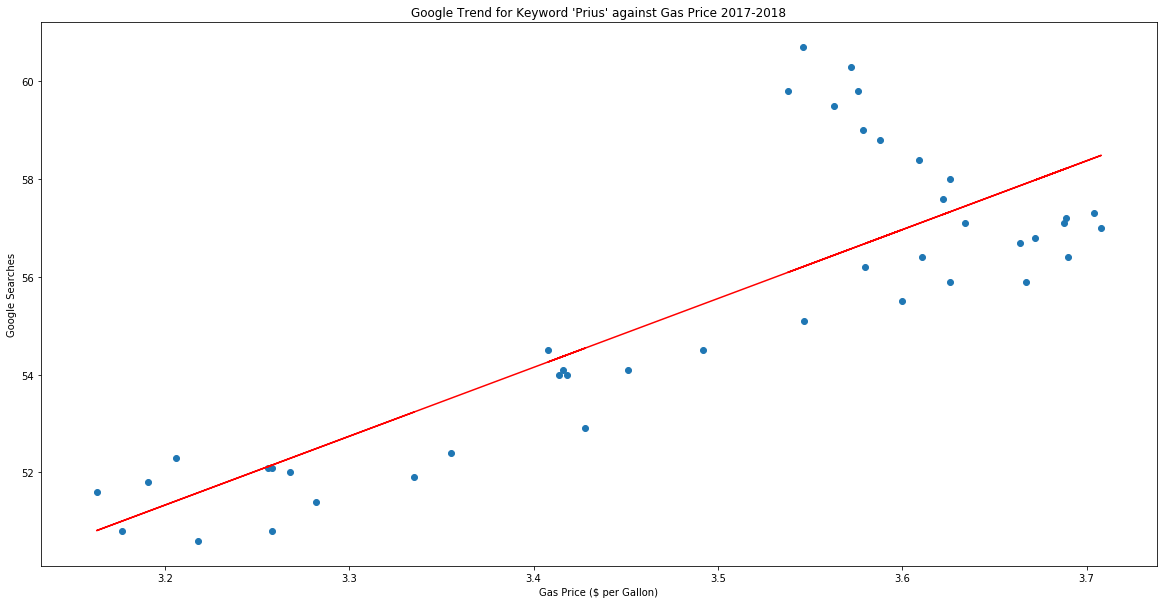

In [94]:
#scatter plot of gas prices v. prius searches

plt.figure(figsize=(20,10))
plt.scatter(rolled_gas_list, rolling_prius, alpha=1)
plt.plot(rolled_gas_list, intercept + slope*(rolling_comparison_df["Price"] / 10), 'r', label='fitted line')
plt.title("Google Trend for Keyword 'Prius' against Gas Price 2017-2018")
plt.xlabel("Gas Price ($ per Gallon)")
plt.ylabel("Google Searches")
#plt.savefig("Images/1314/gasprice_rollingprius_scatter.png")

In [95]:
slope, intercept, r_value, p_value, std_err = stats.linregress(rolled_gas_list, rolling_ecar)

In [96]:
print("y=", slope, "* x +", intercept)
print("   ")
print("r-squared:", r_value**2)
print("r-value:", r_value)
print("p-value:", p_value)
print("standard error:", std_err)

y= -1.8949878584136979 * x + 71.1266375595629
   
r-squared: 0.017850082101228834
r-value: -0.13360419941464727
p-value: 0.39303641994478555
standard error: 2.1952464660143183


Text(0,0.5,'Google Searches')

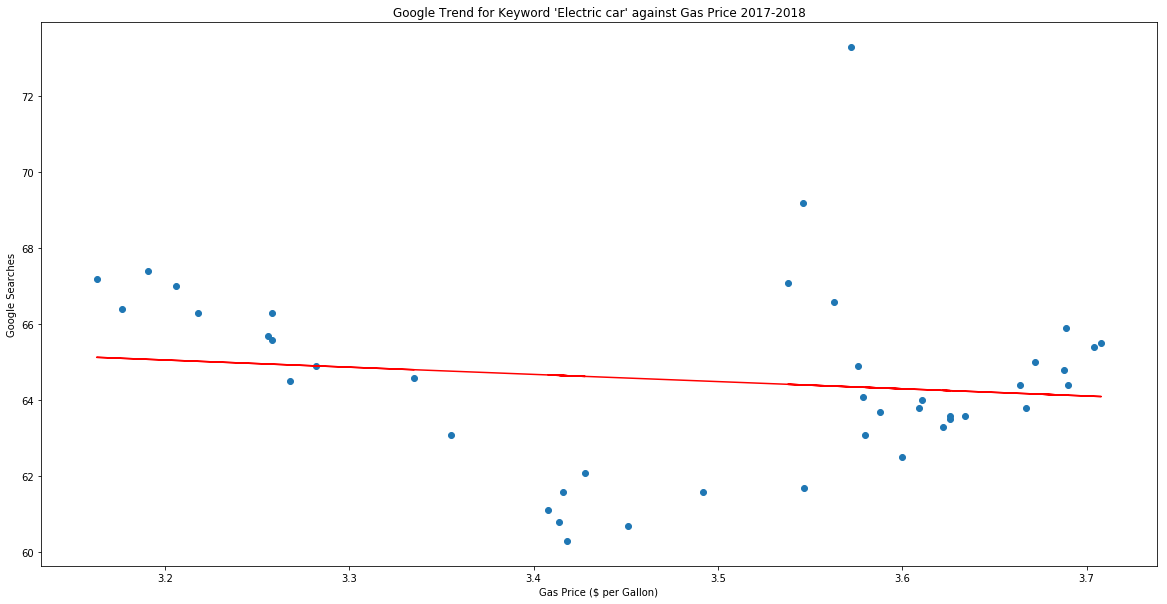

In [97]:
#scatter plot of gas prices v. prius searches

plt.figure(figsize=(20,10))
plt.scatter(rolled_gas_list, rolling_ecar, alpha=1)
plt.plot(rolled_gas_list, intercept + slope*(rolling_comparison_df["Price"] / 10), 'r', label='fitted line')
plt.title("Google Trend for Keyword 'Electric car' against Gas Price 2017-2018")
plt.xlabel("Gas Price ($ per Gallon)")
plt.ylabel("Google Searches")
#plt.savefig("Images/1314/gasprice_rollingprius_scatter.png")

In [98]:
slope, intercept, r_value, p_value, std_err = stats.linregress(rolled_gas_list, rolling_tesla)

In [99]:
print("y=", slope, "* x +", intercept)
print("   ")
print("r-squared:", r_value**2)
print("r-value:", r_value)
print("p-value:", p_value)
print("standard error:", std_err)

y= 3.638282594719087 * x + 14.033649000692371
   
r-squared: 0.10149983797016363
r-value: 0.31859039214980045
p-value: 0.03732639073019952
standard error: 1.6905612333323057


Text(0,0.5,'Google Searches')

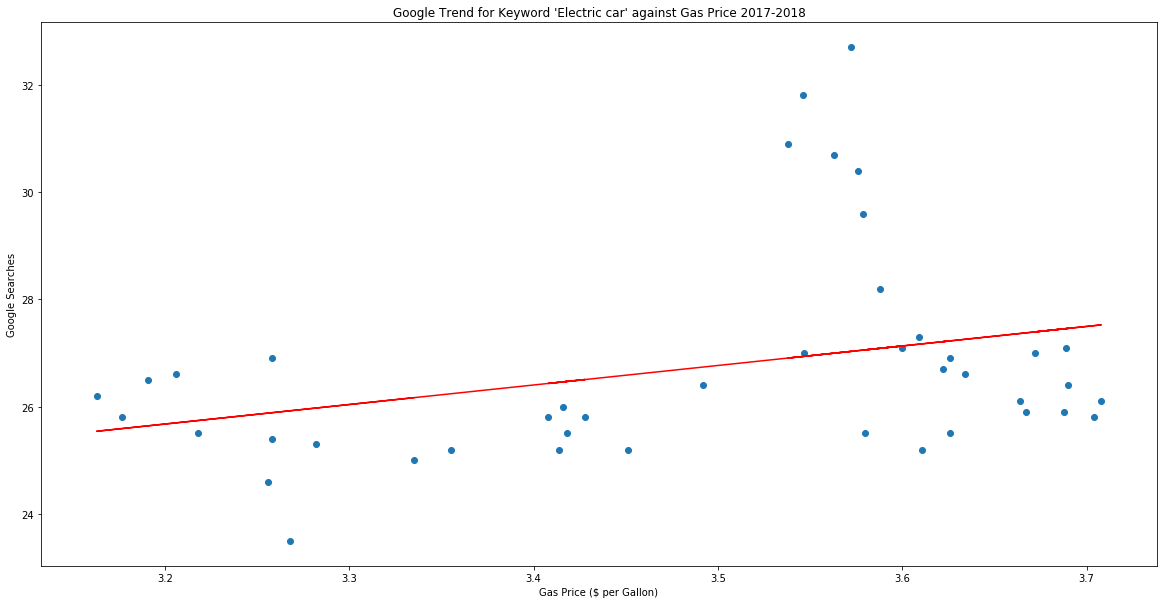

In [100]:
#scatter plot of gas prices v. prius searches

plt.figure(figsize=(20,10))
plt.scatter(rolled_gas_list, rolling_tesla, alpha=1)
plt.plot(rolled_gas_list, intercept + slope*(rolling_comparison_df["Price"] / 10), 'r', label='fitted line')
plt.title("Google Trend for Keyword 'Electric car' against Gas Price 2017-2018")
plt.xlabel("Gas Price ($ per Gallon)")
plt.ylabel("Google Searches")
#plt.savefig("Images/1314/gasprice_rollingprius_scatter.png")